Author: Tyler Nill <br>
Co-Authors: Matthew Murphy, Brianna Isola <br>
RRc Lyrae Star SS Psc Photometric Properties Markdown: <br>
Version 1.1

In [50]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.optimize import curve_fit
from astropy.io import fits
from astropy.time import Time
from scipy.optimize import leastsq
from scipy import stats
from scipy.stats import norm
import csv
import math as m

from scipy import optimize

Due to weather constraints, we had to observe the RRc Lyrae Star SS Psc over three nights. Most of the data were affected by atmospheric conditions, so over half of this notebook is just working through opening the files and removing the exoposures to get a general light curve for each night. All of the data has been corrected for hot and dead pixels, and the star's coordinates were fixed for each CCD image.

Once this was done, the three nights were combined into one light curve and adjusted so the light curve can be seen on one night. After fitting a sine wave to the plot, the period was found, which helped find some other photometric properties of SS Psc.

### Night Two

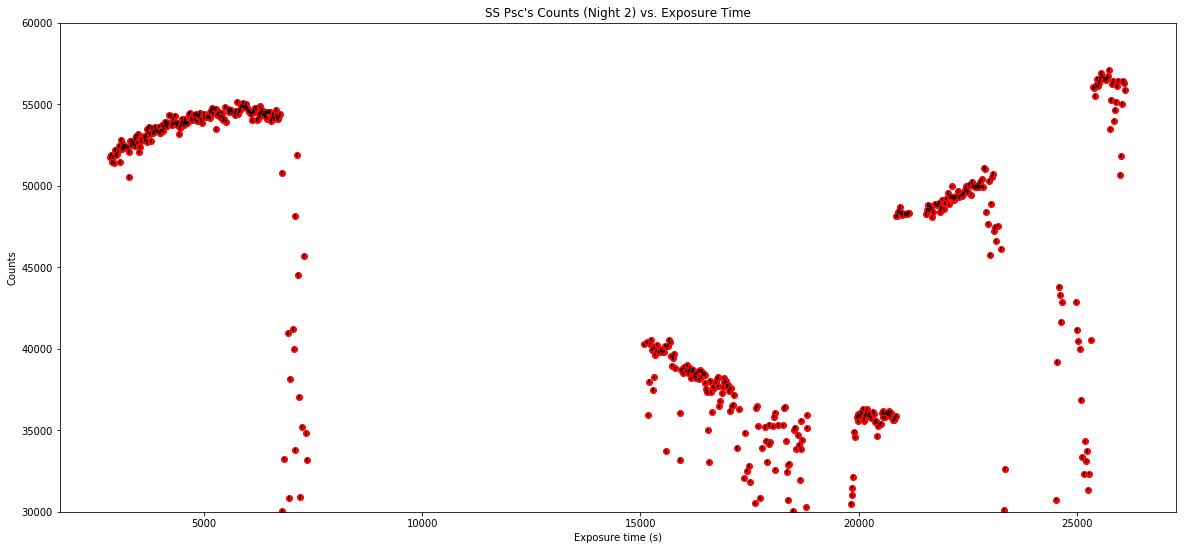

In [51]:
# Open the .dat file containing the exposure time, flux, and flux error and append them to their appropriate lists

file1 = open('startable.dat')

list = []
for line in file1:
        list += [line.split()]
    
starx = [float(x[0]) for x in list] 
starflux = [float(y[1]) for y in list] 
starfluxerr = [float(z[2]) for z in list]

# Plot the flux and flux error by their exposure time

plt.errorbar(starx,starflux, yerr=starfluxerr, color ='red', ecolor='black', barsabove='true', fmt='o')
plt.title("SS Psc's Counts (Night 2) vs. Exposure Time")
plt.xlabel('Exposure time (s)')
plt.ylabel('Counts')
plt.ylim(30000,60000)
plt.rcParams["figure.figsize"] = [25,9]
plt.show()



In [52]:
# Since shown above, there are two exposure times that we used to take CCD images. So, I used this below to identify
# where the 15 second exposure time changed to 20 second exposures

print(starx[517],starflux[517])
print(starx[516],starflux[516])

(20867.3, 48118.54)
(20847.5, 35871.87)


In [53]:
# Correct the fluxes so they're independent of exposure time now and convert the final flux list to an array

D1 = 15
D2 = 20
rmstarflux = starflux[517:]
rmstarfluxerr = starfluxerr[517:]
origstarflux = starflux[:517]
origstarfluxerr = starfluxerr[:517]
lcorrstarflux= [x / D2 for x in rmstarflux]
lerr= [x / D2 for x in rmstarfluxerr]
rcorrstarflux= [x / D1 for x in origstarflux]
rerr= [x / D2 for x in origstarfluxerr]
finalstarflux = rcorrstarflux + lcorrstarflux
finalstarfluxerr = rerr + lerr
stararray = np.array(finalstarflux)
starerrarray = np.array(finalstarfluxerr)

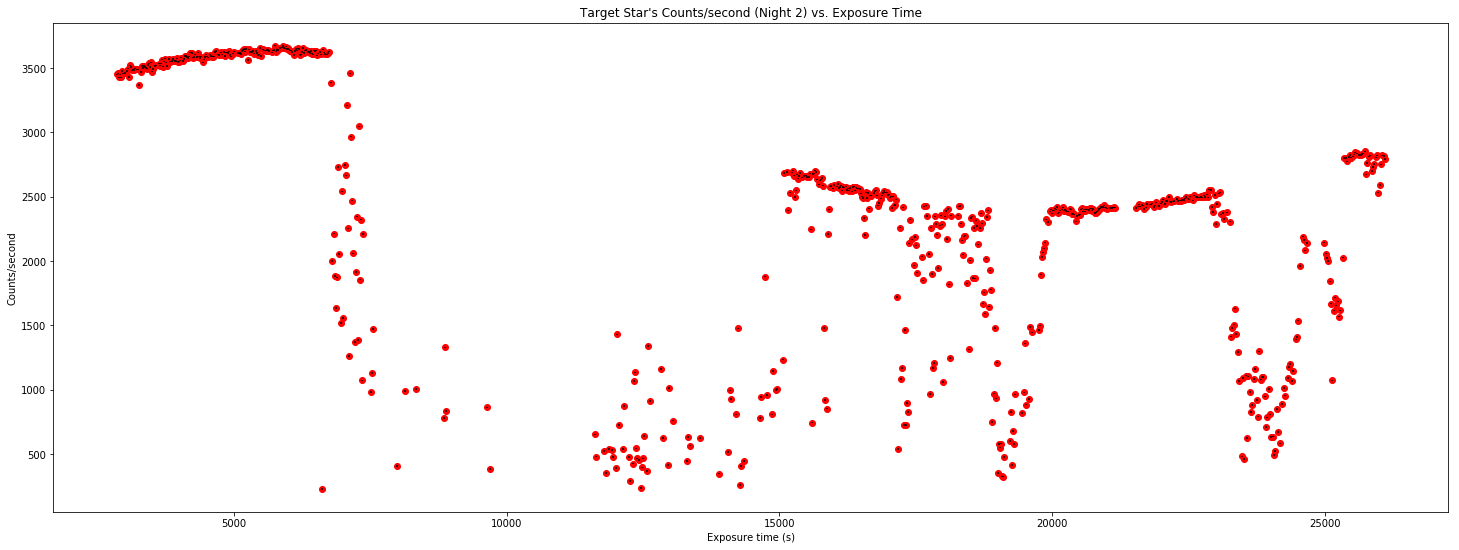

In [54]:
# Plot the Counts/second against exposure time for the target star to see that here is no big jump in the flux

plt.errorbar(starx,finalstarflux, yerr=finalstarfluxerr, color ='red', ecolor='black', barsabove='true', fmt='o')
plt.title("Target Star's Counts/second (Night 2) vs. Exposure Time")
plt.xlabel('Exposure time (s)')
plt.ylabel('Counts/second')
plt.rcParams["figure.figsize"] = [25,9]
plt.show()

In [55]:
# Open the .dat files for the reference stars and calibration stars and do the same exposure time corrections above
# Divide the exposure corrected lists by their mean, and do the same thing with the error for the reference stars, and
# then convert all the lists into numpy arrays

file2 = open('caltable.dat')
file3 = open('ref1table.dat')
file4 = open('ref2table.dat')
file5 = open('ref3table.dat')
file6 = open('ref4table.dat')
file7 = open('ref5table.dat')
D1 = 15
D2 = 20

list = []
for line in file2:
        list += [line.split()]
    
calx = [float(x[0]) for x in list] 
calflux = [float(y[1]) for y in list] 
calfluxerr = [float(z[2]) for z in list]
rmcalflux = calflux[517:]
rmcalfluxerr = calfluxerr[517:]
origcalflux = calflux[:517]
origcalfluxerr = calfluxerr[:517]
rcorrcalflux= [x / D2 for x in rmcalflux]
rcalerr= [x / D2 for x in rmcalfluxerr]
lcorrcalflux= [x / D1 for x in origcalflux]
lcalerr= [x / D1 for x in origcalfluxerr]
finalcalflux = lcorrcalflux + rcorrcalflux
finalcalfluxerr = lcalerr + rcalerr
calarray = np.array(finalcalflux)
calerrarray = np.array(finalcalfluxerr)
list = []
for line in file3:
        list += [line.split()]
    
ref1x = [float(x[0]) for x in list] 
ref1flux = [float(y[1]) for y in list] 
ref1fluxerr = [float(z[2]) for z in list]
rmref1flux = ref1flux[517:]
rmref1fluxerr = ref1fluxerr[517:]
origref1flux = ref1flux[:517]
origref1fluxerr = ref1fluxerr[:517]
rcorrref1flux= [x / D2 for x in rmref1flux]
rref1err= [x / D2 for x in rmref1fluxerr]
lcorrref1flux= [x / D1 for x in origref1flux]
lref1err= [x / D1 for x in origref1fluxerr]
finalref1flux = lcorrref1flux + rcorrref1flux
finalref1fluxerr = lref1err + rref1err
ref1mean = np.mean(finalref1flux)
ref1star = finalref1flux/ref1mean
ref1err = finalref1fluxerr/ref1mean
ref1array = np.array(ref1star)
ref1errarray = np.array(ref1err)

list = []
for line in file4:
        list += [line.split()]
    
ref2x = [float(x[0]) for x in list] 
ref2flux = [float(y[1]) for y in list] 
ref2fluxerr = [float(z[2]) for z in list]
rmref2flux = ref2flux[517:]
rmref2fluxerr = ref2fluxerr[517:]
origref2flux = ref2flux[:517]
origref2fluxerr = ref2fluxerr[:517]
rcorrref2flux= [x / D2 for x in rmref2flux]
rref2err= [x / D2 for x in rmref2fluxerr]
lcorrref2flux= [x / D1 for x in origref2flux]
lref2err= [x / D1 for x in origref2fluxerr]
finalref2flux = lcorrref2flux + rcorrref2flux
finalref2fluxerr = lref2err + rref2err
ref2mean = np.mean(finalref2flux)
ref2star = finalref2flux/ref2mean
ref2err = finalref2fluxerr/ref2mean
ref2array = np.array(ref2star)
ref2errarray = np.array(ref2err)

list = []
for line in file5:
        list += [line.split()]
    
ref3x = [float(x[0]) for x in list] 
ref3flux = [float(y[1]) for y in list] 
ref3fluxerr = [float(z[2]) for z in list]
rmref3flux = ref3flux[517:]
rmref3fluxerr = ref3fluxerr[517:]
origref3flux = ref3flux[:517]
origref3fluxerr = ref3fluxerr[:517]
rcorrref3flux= [x / D2 for x in rmref3flux]
rref3err= [x / D2 for x in rmref3fluxerr]
lcorrref3flux= [x / D1 for x in origref3flux]
lref3err= [x / D1 for x in origref3fluxerr]
finalref3flux = lcorrref3flux + rcorrref3flux
finalref3fluxerr = lref3err + rref3err
ref3mean = np.mean(finalref3flux)
ref3star = finalref3flux/ref3mean
ref3err = finalref3fluxerr/ref3mean
ref3array = np.array(ref3star)
ref3errarray = np.array(ref3err)

list = []
for line in file6:
        list += [line.split()]
    
ref4x = [float(x[0]) for x in list] 
ref4flux = [float(y[1]) for y in list] 
ref4fluxerr = [float(z[2]) for z in list]
rmref4flux = ref4flux[517:]
rmref4fluxerr = ref4fluxerr[517:]
origref4flux = ref4flux[:517]
origref4fluxerr = ref4fluxerr[:517]
rcorrref4flux= [x / D2 for x in rmref4flux]
rref4err= [x / D2 for x in rmref4fluxerr]
lcorrref4flux= [x / D1 for x in origref4flux]
lref4err= [x / D1 for x in origref4fluxerr]
finalref4flux = lcorrref4flux + rcorrref4flux
finalref4fluxerr = lref4err + rref4err
ref4mean = np.mean(finalref4flux)
ref4star = finalref4flux/ref4mean
ref4err = finalref4fluxerr/ref4mean
ref4array = np.array(ref4star)
ref4errarray = np.array(ref4err)

list = []
for line in file7:
        list += [line.split()]
    
ref5x = [float(x[0]) for x in list] 
ref5flux = [float(y[1]) for y in list] 
ref5fluxerr = [float(z[2]) for z in list]
rmref5flux = ref5flux[517:]
rmref5fluxerr = ref5fluxerr[517:]
origref5flux = ref5flux[:517]
origref5fluxerr = ref5fluxerr[:517]
rcorrref5flux= [x / D2 for x in rmref5flux]
rref5err= [x / D2 for x in rmref5fluxerr]
lcorrref5flux= [x / D1 for x in origref5flux]
lref5err= [x / D1 for x in origref5fluxerr]
finalref5flux = lcorrref5flux + rcorrref5flux
finalref5fluxerr = lref5err + rref5err
ref5mean = np.mean(finalref5flux)
ref5star = finalref5flux/ref5mean
ref5err = finalref5fluxerr/ref5mean
ref5array = np.array(ref5star)
ref5errarray = np.array(ref5err)



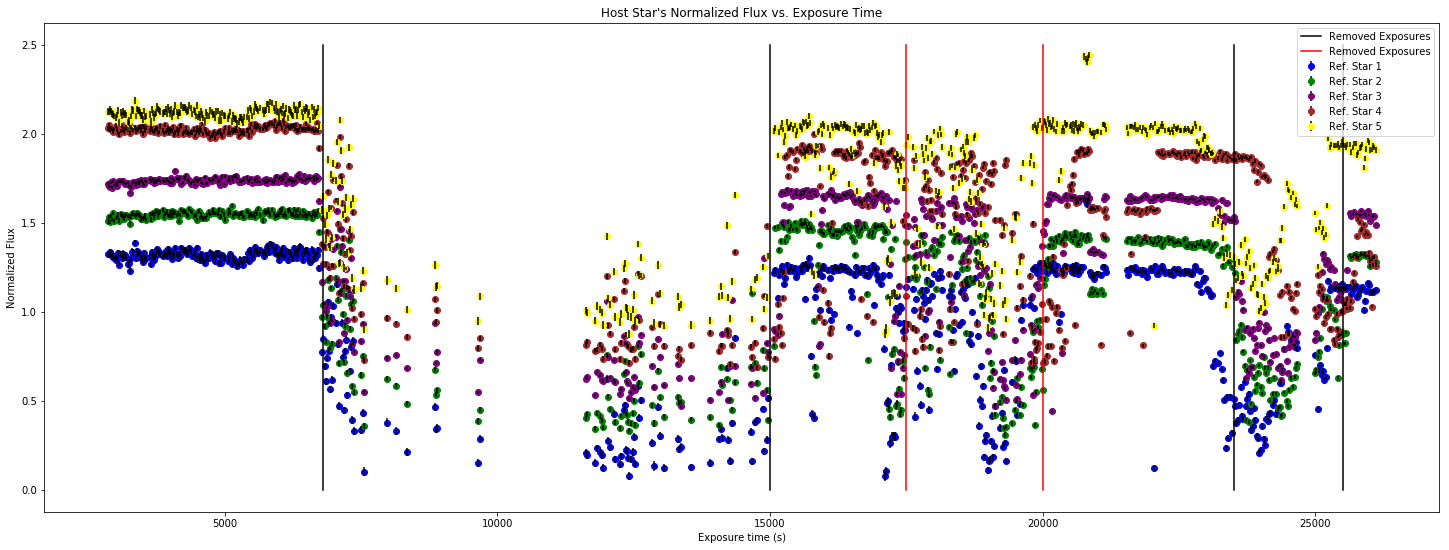

In [56]:
# Plot the reference stars all on the same plot, wich each relative flux bumped up by a constant so all reference stars
# are viewabale

# Create the two vertical lines that indicate when the transit starts and ends
x1 = [6800,6800]
y1 = [0,2.5]
x2 = [15000, 15000]
y2 = [0,2.5]
x3 = [17500, 17500]
y3 = [0,2.5]
x4 = [20000, 20000]
y4 = [0,2.5]
x5 = [23500, 23500]
y5 = [0,2.5]
x6 = [25500, 25500]
y6 = [0,2.5]

plt.errorbar(ref1x,ref1star, yerr = ref1err, color = 'blue', ecolor='black', barsabove='true', fmt='o', label='Ref. Star 1')
plt.errorbar(ref2x,ref2star+.2, yerr = ref2err, color = 'green', ecolor='black', barsabove='true', fmt='o', label='Ref. Star 2')
plt.errorbar(ref3x,ref3star+.4, yerr = ref3err, color = 'purple', ecolor='black', barsabove='true', fmt='o', label='Ref. Star 3')
plt.errorbar(ref4x,ref4star+.6, yerr = ref4err, color = 'brown', ecolor='black', barsabove='true', fmt='o', label='Ref. Star 4')
plt.errorbar(ref5x,ref5star+.8, yerr = ref5err, color = 'yellow', ecolor='black', barsabove='true', fmt='o', label='Ref. Star 5')

plt.plot(x1, y1, color= 'black', label='Removed Exposures')
plt.plot(x2, y2, color= 'black')
plt.plot(x3, y3, color= 'red', label='Removed Exposures')
plt.plot(x4, y4, color= 'red')
plt.plot(x5, y5, color= 'black')
plt.plot(x6, y6, color= 'black')

plt.legend(loc='upper right')
plt.ylabel("Normalized Flux")
plt.xlabel("Exposure time (s)")
plt.title("Host Star's Normalized Flux vs. Exposure Time")
#plt.ylim(0.97,1.015)
plt.rcParams["figure.figsize"] = [20,9]
plt.show()



In [57]:
# Since we want to reduce the statistical noise as well as the systematic uncertainty, we want to compute the weighted mean
# and the corresponding error on the weighted mean

meannum = (ref1array/(ref1errarray**2)) + (ref2array/(ref2errarray**2)) + (ref3array/ref3errarray**2) + \
    (ref4array/ref4errarray**2) + (ref5array/ref5errarray**2) 
    

meandenom = 1/((ref1errarray**2)) + 1/((ref2errarray**2)) + 1/(ref3errarray**2) + 1/(ref4errarray**2) + 1/(ref5errarray**2)

refmean = meannum/meandenom
refmeanerr = (1/meandenom)**(1/2)

# Divide the target star and the calibration star by the weighted mean, and find the corresponding errors of the two

r_i = stararray/refmean
r_ierror = r_i * np.sqrt((starerrarray/stararray)**2 + (refmeanerr/refmean)**2)
cal_i = calarray/refmean
cal_ierror = cal_i * np.sqrt((calerrarray/calarray)**2 + (refmeanerr/refmean)**2)


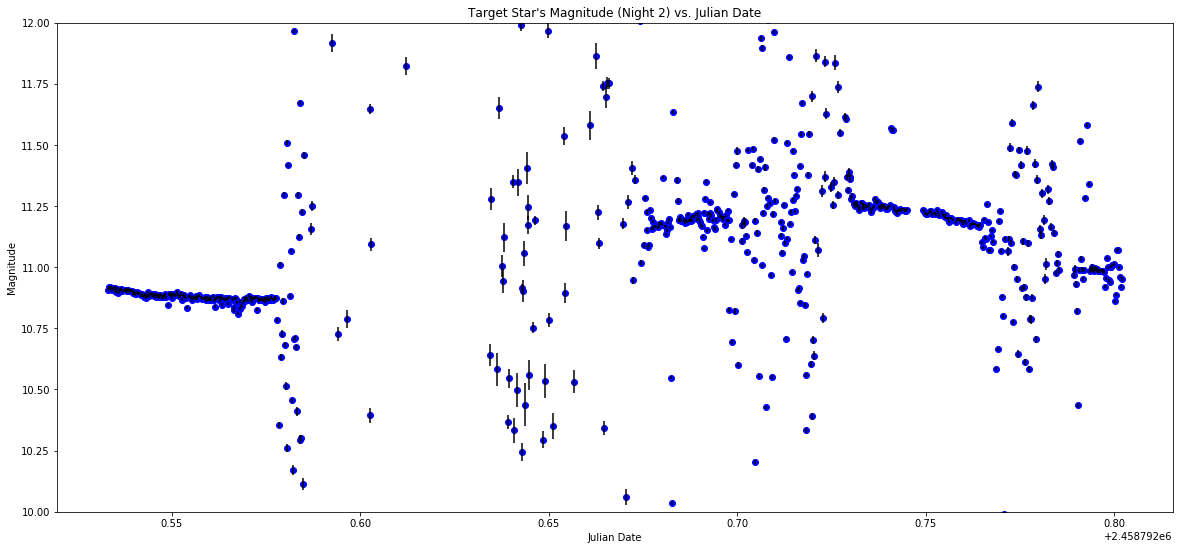

In [58]:
# Using the magnitude of the calibration star, one can use the flux/mag equation to find the magnitude of the target star,
# as well as the corresponding error of the target star

m_cal = 8.86

magstar=[]
for a,b in zip(r_i,cal_i):
    m = m_cal - 2.5 * np.log10(a/b)
    magstar.append(m)

m_error = ( ((-1.08574/r_i)*r_ierror)**2 + ((-1.08574/cal_i) *cal_ierror)**2)**(1/2)

# Convert exposure time to julian date and plot the magnitude with its error vs. julian date 

date = np.genfromtxt('date2.dat', dtype='str')
timedate= Time(date)
jdate = timedate.jd
jdatecorr = jdate[:690]

plt.errorbar(jdatecorr,magstar, yerr = m_error, color = 'blue', ecolor='black', barsabove='true', fmt='o')
plt.ylim(10,12)


plt.title("Target Star's Magnitude (Night 2) vs. Julian Date")
plt.ylabel('Magnitude')
plt.xlabel('Julian Date')
plt.rcParams["figure.figsize"] = [20,9]

plt.show()

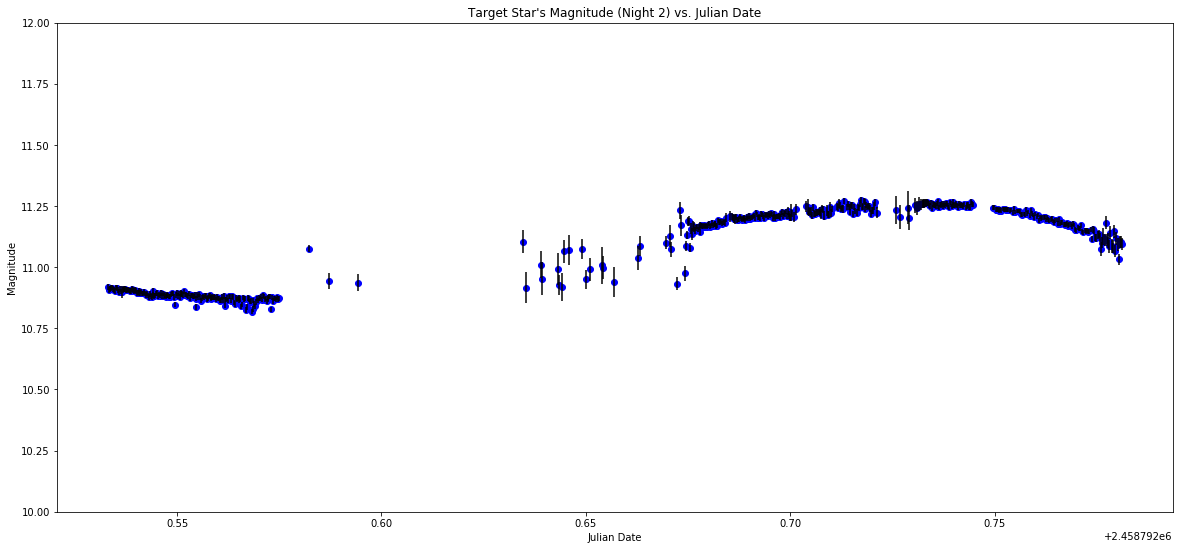

In [59]:
# Use the corrected night 2 magnitude data and plot it

file_corr = open('n2mcurve.dat')
list = []
for line in file_corr:
        list += [line.split()]
    
corr_jdate_n2 = [float(x[0]) for x in list] 
corr_m_n2 = [float(y[1]) for y in list] 
corr_m_err_n2 = [float(z[2]) for z in list]

plt.errorbar(corr_jdate_n2,corr_m_n2, yerr = corr_m_err_n2, color = 'blue', ecolor='black', barsabove='true', fmt='o')
plt.ylim(10,12)

plt.title("Target Star's Magnitude (Night 2) vs. Julian Date")
plt.ylabel('Magnitude')
plt.xlabel('Julian Date')
plt.rcParams["figure.figsize"] = [20,9]
plt.show()

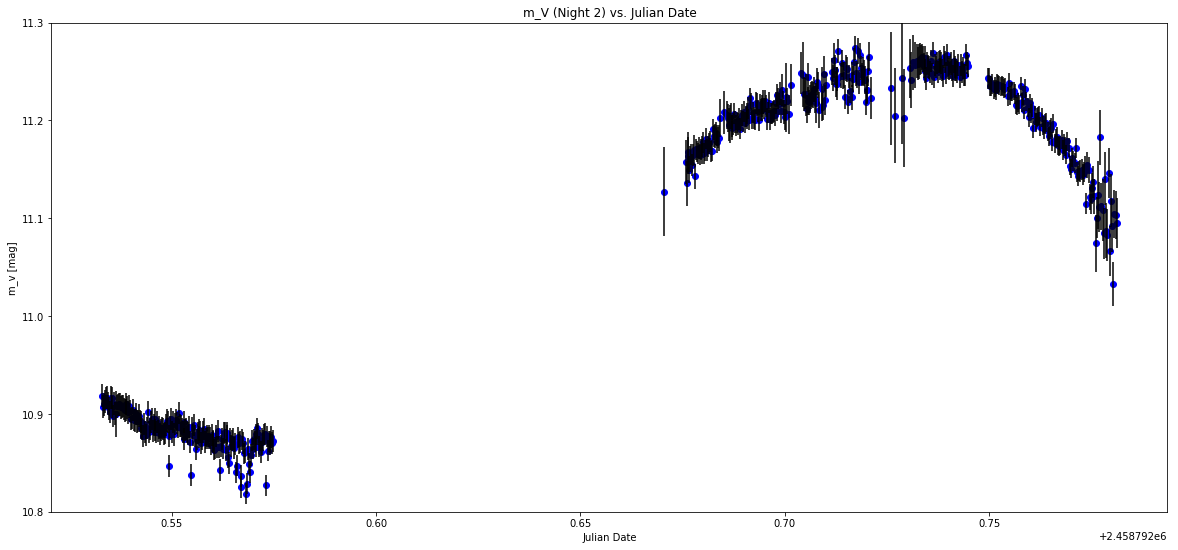

In [60]:
# Remove the exposures te exposures that are due to clouds/atmospheric instability and plot it once again

rm_m_jdate = np.delete(corr_jdate_n2,[184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,\
                                      204,206,207,208,209,210,211,212,213,214,215],0)
rm_m = np.delete(corr_m_n2,[184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,\
                                      204,206,207,208,209,210,211,212,213,214,215],0)
rm_m_error = np.delete(corr_m_err_n2,[184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,\
                                      204,206,207,208,209,210,211,212,213,214,215],0)

plt.errorbar(rm_m_jdate,rm_m, yerr = rm_m_error, color = 'blue', ecolor='black', barsabove='true', fmt='o')
plt.ylim(10.8,11.3)

plt.title("m_V (Night 2) vs. Julian Date")
plt.ylabel('m_v [mag]')
plt.xlabel('Julian Date')
plt.rcParams["figure.figsize"] = [20,9]
plt.show()

### Night Three

In [61]:
# Open the target star's data for night 3, along with the julian date for each data point, and calculate the exposure corrected
# counts along with its corresponding error, and then plot it

file8 = open('star_n3.dat')

list = []
for line in file8:
        list += [line.split()]
    
starflux_n3 = [float(x[0]) for x in list] 
starfluxerr_n3 = [float(y[1]) for y in list] 

date_n3 = np.genfromtxt('date2_n3.dat', dtype='str')
timedate_n3= Time(date_n3)
jdate_n3 = timedate_n3.jd
    
D1 = 25
D2 = 15
rmstarflux_n3 = starflux_n3[231:]
rmstarfluxerr_n3 = starfluxerr_n3[231:]
origstarflux_n3 = starflux_n3[:231]
origstarfluxerr_n3 = starfluxerr_n3[:231]
lcorrstarflux_n3= [x / D2 for x in rmstarflux_n3]
lerr_n3= [x / D2 for x in rmstarfluxerr_n3]
rcorrstarflux_n3= [x / D1 for x in origstarflux_n3]
rerr_n3= [x / D2 for x in origstarfluxerr_n3]
finalstarflux_n3 = rcorrstarflux_n3 + lcorrstarflux_n3
finalstarfluxerr_n3 = rerr_n3 + lerr_n3
stararray_n3 = np.array(finalstarflux_n3)
starerrarray_n3 = np.array(finalstarfluxerr_n3)

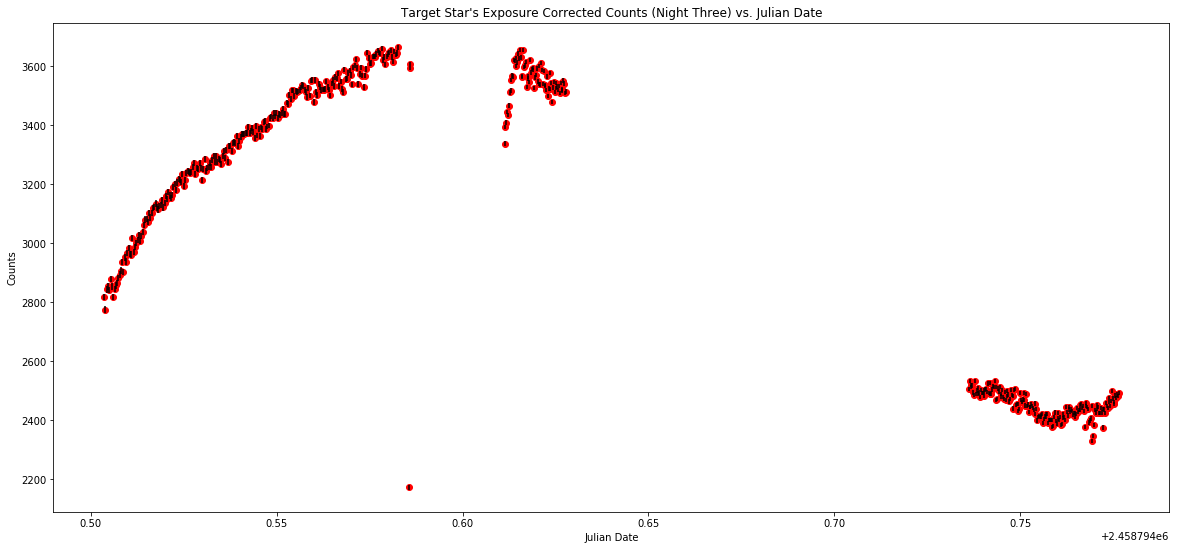

In [62]:
plt.errorbar(jdate_n3,finalstarflux_n3, yerr=finalstarfluxerr_n3, color ='red', ecolor='black', barsabove='true', fmt='o')
plt.title("Target Star's Exposure Corrected Counts (Night Three) vs. Julian Date")
plt.xlabel('Julian Date')
plt.ylabel('Counts')
plt.rcParams["figure.figsize"] = [25,9]
plt.show()

In [63]:
# Open the calibration star and reference star .dat files, calculate the exposure time corrected count values for all of 
# them and then divide the reference star's counts by the mean number of counts (doing the same for the error as well),
# then turn the exposure corrected and mean corrected count values into numpy arrays and plot the reference stars

file9 = open('cal_n3.dat')
file10 = open('ref1_n3.dat')
file11 = open('ref2_n3.dat')
file12 = open('ref3_n3.dat')
file13 = open('ref4_n3.dat')
file14 = open('ref5_n3.dat')


D1 = 25
D2 = 15

list = []
for line in file9:
        list += [line.split()]
    
calflux_n3 = [float(y[0]) for y in list] 
calfluxerr_n3 = [float(z[1]) for z in list]
rmcalflux_n3 = calflux_n3[231:]
rmcalfluxerr_n3 = calfluxerr_n3[231:]
origcalflux_n3 = calflux_n3[:231]
origcalfluxerr_n3 = calfluxerr_n3[:231]
rcorrcalflux_n3= [x / D2 for x in rmcalflux_n3]
rcalerr_n3= [x / D2 for x in rmcalfluxerr_n3]
lcorrcalflux_n3= [x / D1 for x in origcalflux_n3]
lcalerr_n3= [x / D1 for x in origcalfluxerr_n3]
finalcalflux_n3 = lcorrcalflux_n3 + rcorrcalflux_n3
finalcalfluxerr_n3 = lcalerr_n3 + rcalerr_n3
calarray_n3 = np.array(finalcalflux_n3)
calerrarray_n3 = np.array(finalcalfluxerr_n3)


list = []
for line in file10:
        list += [line.split()]
    
ref1flux_n3 = [float(y[0]) for y in list] 
ref1fluxerr_n3 = [float(z[1]) for z in list]
rmref1flux_n3 = ref1flux_n3[231:]
rmref1fluxerr_n3 = ref1fluxerr_n3[231:]
origref1flux_n3 = ref1flux_n3[:231]
origref1fluxerr_n3 = ref1fluxerr_n3[:231]
rcorrref1flux_n3= [x / D2 for x in rmref1flux_n3]
rref1err_n3= [x / D2 for x in rmref1fluxerr_n3]
lcorrref1flux_n3= [x / D1 for x in origref1flux_n3]
lref1err_n3= [x / D1 for x in origref1fluxerr_n3]
finalref1flux_n3 = lcorrref1flux_n3 + rcorrref1flux_n3
finalref1fluxerr_n3 = lref1err_n3 + rref1err_n3
ref1mean_n3 = np.mean(finalref1flux_n3)
ref1star_n3 = finalref1flux_n3/ref1mean_n3
ref1err_n3 = finalref1fluxerr_n3/ref1mean_n3
ref1array_n3 = np.array(ref1star_n3)
ref1errarray_n3 = np.array(ref1err_n3)

list = []
for line in file11:
        list += [line.split()]
    
ref2flux_n3 = [float(y[0]) for y in list] 
ref2fluxerr_n3 = [float(z[1]) for z in list]
rmref2flux_n3 = ref2flux_n3[231:]
rmref2fluxerr_n3 = ref2fluxerr_n3[231:]
origref2flux_n3 = ref2flux_n3[:231]
origref2fluxerr_n3 = ref2fluxerr_n3[:231]
rcorrref2flux_n3= [x / D2 for x in rmref2flux_n3]
rref2err_n3= [x / D2 for x in rmref2fluxerr_n3]
lcorrref2flux_n3= [x / D1 for x in origref2flux_n3]
lref2err_n3= [x / D1 for x in origref2fluxerr_n3]
finalref2flux_n3 = lcorrref2flux_n3 + rcorrref2flux_n3
finalref2fluxerr_n3 = lref2err_n3 + rref2err_n3
ref2mean_n3 = np.mean(finalref2flux_n3)
ref2star_n3 = finalref2flux_n3/ref2mean_n3
ref2err_n3 = finalref2fluxerr_n3/ref2mean_n3
ref2array_n3 = np.array(ref2star_n3)
ref2errarray_n3 = np.array(ref2err_n3)

list = []
for line in file12:
        list += [line.split()]
    
ref3flux_n3 = [float(y[0]) for y in list] 
ref3fluxerr_n3 = [float(z[1]) for z in list]
rmref3flux_n3 = ref3flux_n3[231:]
rmref3fluxerr_n3 = ref3fluxerr_n3[231:]
origref3flux_n3 = ref3flux_n3[:231]
origref3fluxerr_n3 = ref3fluxerr_n3[:231]
rcorrref3flux_n3= [x / D2 for x in rmref3flux_n3]
rref3err_n3= [x / D2 for x in rmref3fluxerr_n3]
lcorrref3flux_n3= [x / D1 for x in origref3flux_n3]
lref3err_n3= [x / D1 for x in origref3fluxerr_n3]
finalref3flux_n3 = lcorrref3flux_n3 + rcorrref3flux_n3
finalref3fluxerr_n3 = lref3err_n3 + rref3err_n3
ref3mean_n3 = np.mean(finalref3flux_n3)
ref3star_n3 = finalref3flux_n3/ref3mean_n3
ref3err_n3 = finalref3fluxerr_n3/ref3mean_n3
ref3array_n3 = np.array(ref3star_n3)
ref3errarray_n3 = np.array(ref3err_n3)

list = []
for line in file13:
        list += [line.split()]
    
ref4flux_n3 = [float(y[0]) for y in list] 
ref4fluxerr_n3 = [float(z[1]) for z in list]
rmref4flux_n3 = ref4flux_n3[231:]
rmref4fluxerr_n3 = ref4fluxerr_n3[231:]
origref4flux_n3 = ref4flux_n3[:231]
origref4fluxerr_n3 = ref4fluxerr_n3[:231]
rcorrref4flux_n3= [x / D2 for x in rmref4flux_n3]
rref4err_n3= [x / D2 for x in rmref4fluxerr_n3]
lcorrref4flux_n3= [x / D1 for x in origref4flux_n3]
lref4err_n3= [x / D1 for x in origref4fluxerr_n3]
finalref4flux_n3 = lcorrref4flux_n3 + rcorrref4flux_n3
finalref4fluxerr_n3 = lref4err_n3 + rref4err_n3
ref4mean_n3 = np.mean(finalref4flux_n3)
ref4star_n3 = finalref4flux_n3/ref4mean_n3
ref4err_n3 = finalref4fluxerr_n3/ref4mean_n3
ref4array_n3 = np.array(ref4star_n3)
ref4errarray_n3 = np.array(ref4err_n3)

list = []
for line in file14:
        list += [line.split()]
    
ref5flux_n3 = [float(y[0]) for y in list] 
ref5fluxerr_n3 = [float(z[1]) for z in list]
rmref5flux_n3 = ref5flux_n3[231:]
rmref5fluxerr_n3 = ref5fluxerr_n3[231:]
origref5flux_n3 = ref5flux_n3[:231]
origref5fluxerr_n3 = ref5fluxerr_n3[:231]
rcorrref5flux_n3= [x / D2 for x in rmref5flux_n3]
rref5err_n3= [x / D2 for x in rmref5fluxerr_n3]
lcorrref5flux_n3= [x / D1 for x in origref5flux_n3]
lref5err_n3= [x / D1 for x in origref5fluxerr_n3]
finalref5flux_n3 = lcorrref5flux_n3 + rcorrref5flux_n3
finalref5fluxerr_n3 = lref5err_n3 + rref5err_n3
ref5mean_n3 = np.mean(finalref5flux_n3)
ref5star_n3 = finalref5flux_n3/ref5mean_n3
ref5err_n3 = finalref5fluxerr_n3/ref5mean_n3
ref5array_n3 = np.array(ref5star_n3)
ref5errarray_n3 = np.array(ref5err_n3)

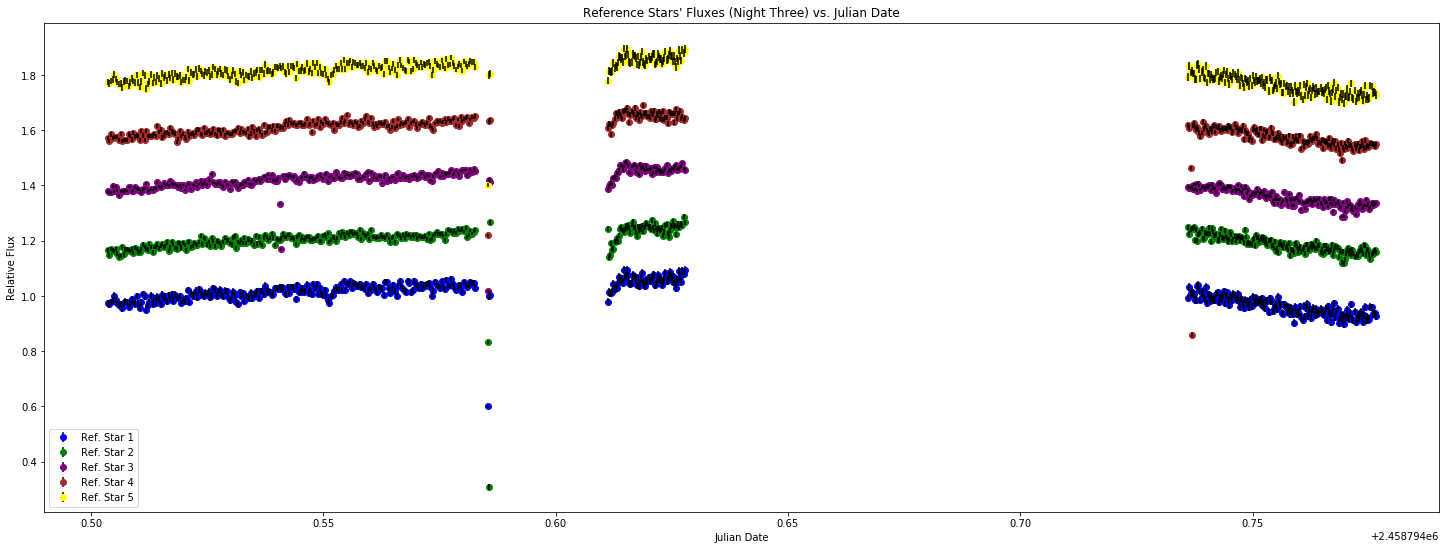

In [64]:
# All the reference stars plotted on one plot with each reference star bumped by a constant so all the values can be seen 
# on one plot

plt.errorbar(jdate_n3,ref1star_n3, yerr = ref1err_n3, color = 'blue', ecolor='black', barsabove='true', fmt='o', label='Ref. Star 1')
plt.errorbar(jdate_n3,ref2star_n3+.2, yerr = ref2err_n3, color = 'green', ecolor='black', barsabove='true', fmt='o', label='Ref. Star 2')
plt.errorbar(jdate_n3,ref3star_n3+.4, yerr = ref3err_n3, color = 'purple', ecolor='black', barsabove='true', fmt='o', label='Ref. Star 3')
plt.errorbar(jdate_n3,ref4star_n3+.6, yerr = ref4err_n3, color = 'brown', ecolor='black', barsabove='true', fmt='o', label='Ref. Star 4')
plt.errorbar(jdate_n3,ref5star_n3+.8, yerr = ref5err_n3, color = 'yellow', ecolor='black', barsabove='true', fmt='o', label='Ref. Star 5')

plt.legend(loc='best')
plt.title("Reference Stars' Fluxes (Night Three) vs. Julian Date")
plt.ylabel('Relative Flux')
plt.xlabel('Julian Date')
plt.rcParams["figure.figsize"] = [20,9]

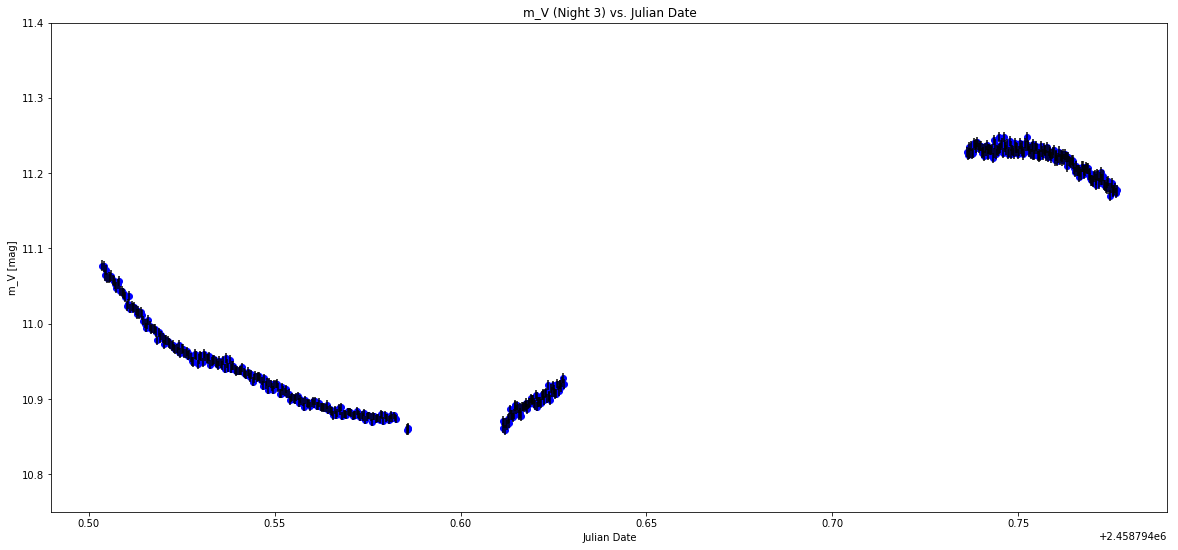

In [65]:
# Using the magnitude of the calibration star, one can use the flux/mag equation to find the magnitude of the target star,
# as well as the corresponding error of the target star for night three

meannum_n3 = (ref1array_n3/(ref1errarray_n3**2)) + (ref2array_n3/(ref2errarray_n3**2)) + (ref3array_n3/ref3errarray_n3**2) + \
    (ref4array_n3/ref4errarray_n3**2) + (ref5array_n3/ref5errarray_n3**2) 
    

meandenom_n3= 1/((ref1errarray_n3**2)) + 1/((ref2errarray_n3**2)) + 1/(ref3errarray_n3**2) + 1/(ref4errarray_n3**2) + \
    1/(ref5errarray_n3**2)

refmean_n3 = meannum_n3/meandenom_n3
refmeanerr_n3 = (1/meandenom_n3)**(1/2)

r_i_n3 = stararray_n3/refmean_n3
r_ierror_n3 = r_i_n3 * np.sqrt((starerrarray_n3/stararray_n3)**2 + (refmeanerr_n3/refmean_n3)**2)
cal_i_n3 = calarray_n3/refmean_n3
cal_ierror_n3 = cal_i_n3 * np.sqrt((calerrarray_n3/calarray_n3)**2 + (refmeanerr_n3/refmean_n3)**2)

# Find the magnitude of the target star using the flux and magnitude of the calibration star, and its corresponding error then
# plot the magnitude with error bars vs. julian date

m_cal = 8.86

magstar_n3=[]
for a,b in zip(r_i_n3,cal_i_n3):
    m = m_cal - 2.5 * np.log10(a/b)
    magstar_n3.append(m)
    
    
m_error_n3 = ( ((-1.08574/r_i_n3)*r_ierror_n3)**2 + ((-1.08574/cal_i_n3) *cal_ierror_n3)**2)**(1/2)
    
plt.errorbar(jdate_n3,magstar_n3, yerr = m_error_n3, color = 'blue', ecolor='black', barsabove='true', fmt='o')
plt.ylim(10.75,11.4)

plt.title("m_V (Night 3) vs. Julian Date")
plt.ylabel('m_V [mag]')
plt.xlabel('Julian Date')
plt.rcParams["figure.figsize"] = [20,9]
plt.show()

### Night 1

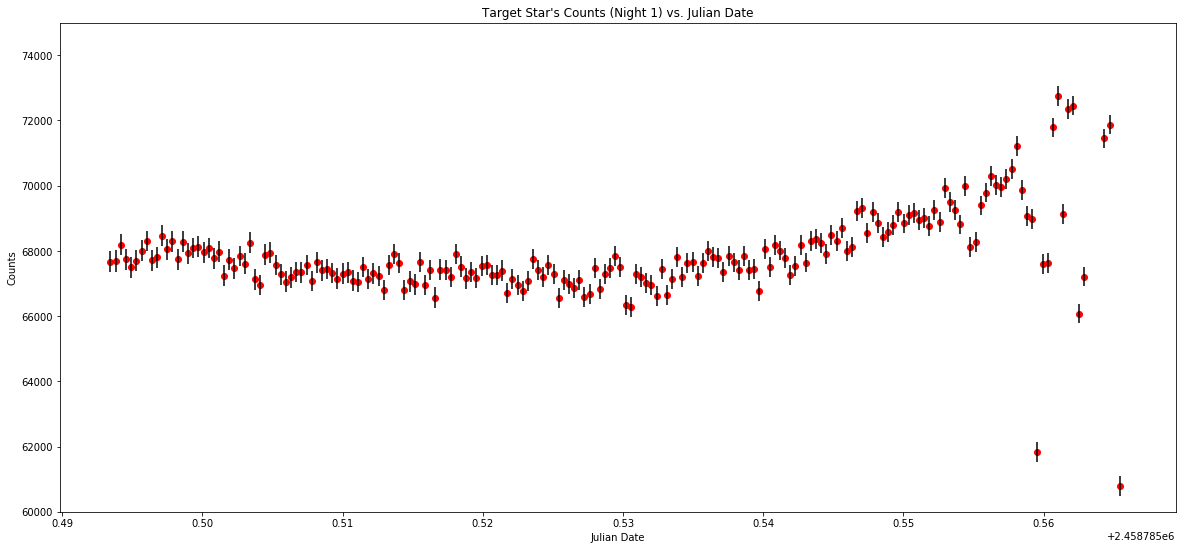

In [66]:
# Open the files containing the julian date and target star for night 1, find the array for the flux and julian date and
# plot it

file15 = open('star_n1.dat')
file16 = open('date_n1.dat')
list = []
for line in file15:
        list += [line.split()]
    
starflux_n1 = [float(y[2]) for y in list] 
starfluxerr_n1 = [float(z[3]) for z in list]
corrstar_n1 = starflux_n1[:198]
corrstarerr_n1 = starfluxerr_n1[:198]
stararray_n1 = np.array(corrstar_n1)
starerrarray_n1 = np.array(corrstarerr_n1)

date_n1 = np.genfromtxt('date5_n1.dat', dtype='str')
timedate_n1= Time(date_n1)
jdate_n1 = timedate_n1.jd
corrjdate_n1 = jdate_n1[:198]

plt.errorbar(corrjdate_n1,corrstar_n1, yerr=corrstarerr_n1, color ='red', ecolor='black', barsabove='true', fmt='o')
plt.title("Target Star's Counts (Night 1) vs. Julian Date")
plt.xlabel('Julian Date')
plt.ylabel('Counts')
plt.ylim(60000,75000)
plt.rcParams["figure.figsize"] = [25,9]
plt.show()



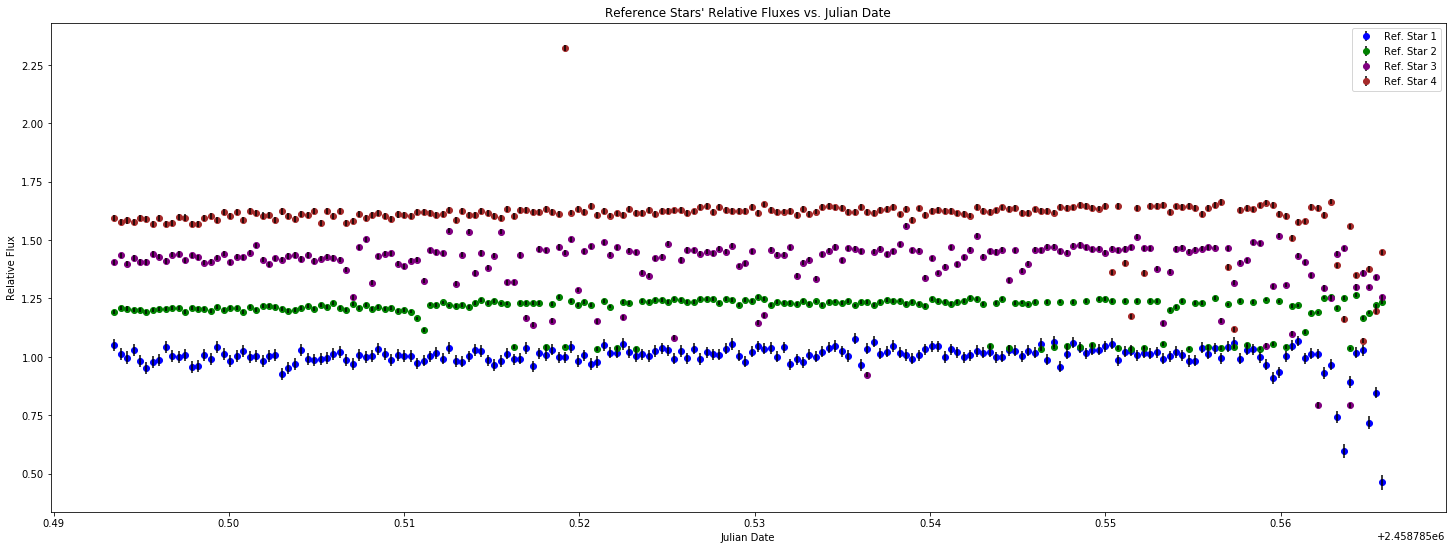

In [67]:
# Open .dat reference stars and cal, appending flux, and fluxerr for each one, then creating numpy arrays
# For the reference stars, their flux and flux error were divided by the mean counts within each reference star,
# then the reference stars were plotted on the same plot together

file17 = open('cal_n1.dat')
file18 = open('ref1_n1.dat')
file19 = open('ref2_n1.dat')
file20 = open('ref3_n1.dat')
file21 = open('ref5_n1.dat')



list = []
for line in file17:
        list += [line.split()]
    
calflux_n1 = [float(y[2]) for y in list] 
calfluxerr_n1 = [float(z[3]) for z in list]
calarray_n1 = np.array(calflux_n1)
calerrarray_n1 = np.array(calfluxerr_n1)

list = []
for line in file18:
        list += [line.split()]
    
ref1flux_n1 = [float(y[2]) for y in list] 
ref1fluxerr_n1 = [float(z[3]) for z in list]
ref1mean_n1 = np.mean(ref1flux_n1)
ref1avg_n1 = ref1flux_n1/ref1mean_n1
ref1avgerr_n1 = ref1fluxerr_n1/ref1mean_n1
ref1array_n1 = np.array(ref1avg_n1)
ref1errarray_n1 = np.array(ref1avgerr_n1)

list = []
for line in file19:
        list += [line.split()]
    
ref2flux_n1 = [float(y[2]) for y in list] 
ref2fluxerr_n1 = [float(z[3]) for z in list]
ref2mean_n1 = np.mean(ref2flux_n1)
ref2avg_n1 = ref2flux_n1/ref2mean_n1
ref2avgerr_n1 = ref2fluxerr_n1/ref2mean_n1
ref2array_n1 = np.array(ref2avg_n1)
ref2errarray_n1 = np.array(ref2avgerr_n1)
list = []
for line in file20:
        list += [line.split()]
    
ref3flux_n1 = [float(y[2]) for y in list] 
ref3fluxerr_n1 = [float(z[3]) for z in list]
ref3mean_n1 = np.mean(ref3flux_n1)
ref3avg_n1 = ref3flux_n1/ref3mean_n1
ref3avgerr_n1 = ref3fluxerr_n1/ref3mean_n1
ref3array_n1 = np.array(ref3avg_n1)
ref3errarray_n1 = np.array(ref3avgerr_n1)

list = []
for line in file21:
        list += [line.split()]
    
ref4flux_n1 = [float(y[2]) for y in list] 
ref4fluxerr_n1 = [float(z[3]) for z in list]
corrref4_n1 = ref4flux_n1[:198]
corrref4err_n1 = ref4fluxerr_n1[:198]
ref4mean_n1 = np.mean(corrref4_n1)
ref4avg_n1 = corrref4_n1/ref4mean_n1
ref4avgerr_n1 = corrref4err_n1/ref4mean_n1
ref4array_n1 = np.array(ref4avg_n1)
ref4errarray_n1 = np.array(ref4avgerr_n1)

plt.errorbar(corrjdate_n1,ref1array_n1, yerr = ref1errarray_n1, color = 'blue', ecolor='black', barsabove='true', fmt='o', label='Ref. Star 1')
plt.errorbar(corrjdate_n1,ref2array_n1+.2, yerr = ref2errarray_n1, color = 'green', ecolor='black', barsabove='true', fmt='o', label='Ref. Star 2')
plt.errorbar(corrjdate_n1,ref3array_n1+.4, yerr = ref3errarray_n1, color = 'purple', ecolor='black', barsabove='true', fmt='o', label='Ref. Star 3')
plt.errorbar(corrjdate_n1,ref4array_n1+.6, yerr = ref4errarray_n1, color = 'brown', ecolor='black', barsabove='true', fmt='o', label='Ref. Star 4')

plt.legend(loc='best')
plt.title("Reference Stars' Relative Fluxes vs. Julian Date")
plt.ylabel('Relative Flux')
plt.xlabel('Julian Date')
plt.rcParams["figure.figsize"] = [20,9]



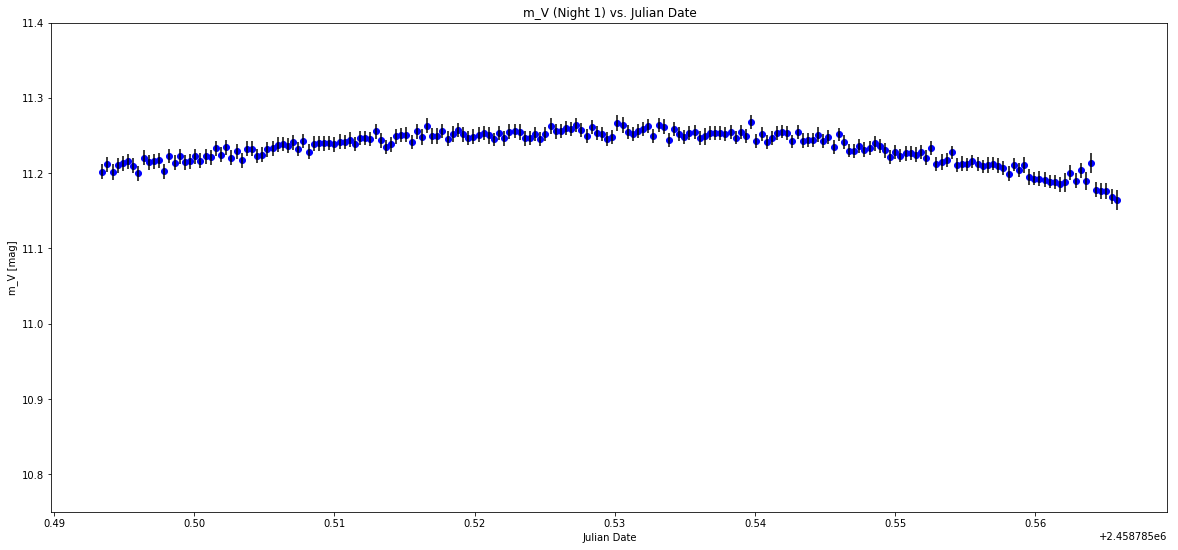

In [68]:
# Find the weighted mean and the error on the weighted mean for night 1, then find the ratio f/mean for the target star
# and the calibration star

meannum_n1 = (ref1array_n1/(ref1errarray_n1**2)) + (ref2array_n1/(ref2errarray_n1**2)) + (ref3array_n1/(ref3errarray_n1**2)) \
    + (ref3array_n1/(ref3errarray_n1**2)) 
    

meandenom_n1 = 1/((ref1errarray_n1**2)) + 1/((ref2errarray_n1**2)) + 1/(ref3errarray_n1**2) + 1/(ref4errarray_n1**2) 

refmean_n1 = meannum_n1/meandenom_n1
refmeanerr_n1 = (1/meandenom_n1)**(1/2)

r_i_n1 = stararray_n1/refmean_n1
r_ierror_n1 = r_i_n1 * np.sqrt((starerrarray_n1/stararray_n1)**2 + (refmeanerr_n1/refmean_n1)**2)
cal_i_n1 = calarray_n1/refmean_n1
cal_ierror_n1 = cal_i_n1 * np.sqrt((calerrarray_n1/calarray_n1)**2 + (refmeanerr_n1/refmean_n1)**2)

# Find the magnitude of the target star along with its error then plot it

m_cal = 8.86

magstar_n1=[]
for a,b in zip(r_i_n1,cal_i_n1):
    m = m_cal - 2.5 * np.log10(a/b)
    magstar_n1.append(m)
    
m_error_n1 = ( ((-1.08574/r_i_n1)*r_ierror_n1)**2 + ((-1.08574/cal_i_n1) *cal_ierror_n1)**2)**(1/2)

plt.errorbar(corrjdate_n1,magstar_n1, yerr = m_error_n1, color = 'blue', ecolor='black', barsabove='true', fmt='o')
plt.ylim(10.75,11.4)
plt.title("m_V (Night 1) vs. Julian Date")
plt.ylabel('m_V [mag]')
plt.xlabel('Julian Date')
plt.rcParams["figure.figsize"] = [20,9]
plt.show()

### All Nights together

In order to have all three nights together, we must shift the first two nights up by a certain amount of time. To find this certain amount of time, we must find the period for each night. Let's find the period for the first night by using the maximum of the magnitude:

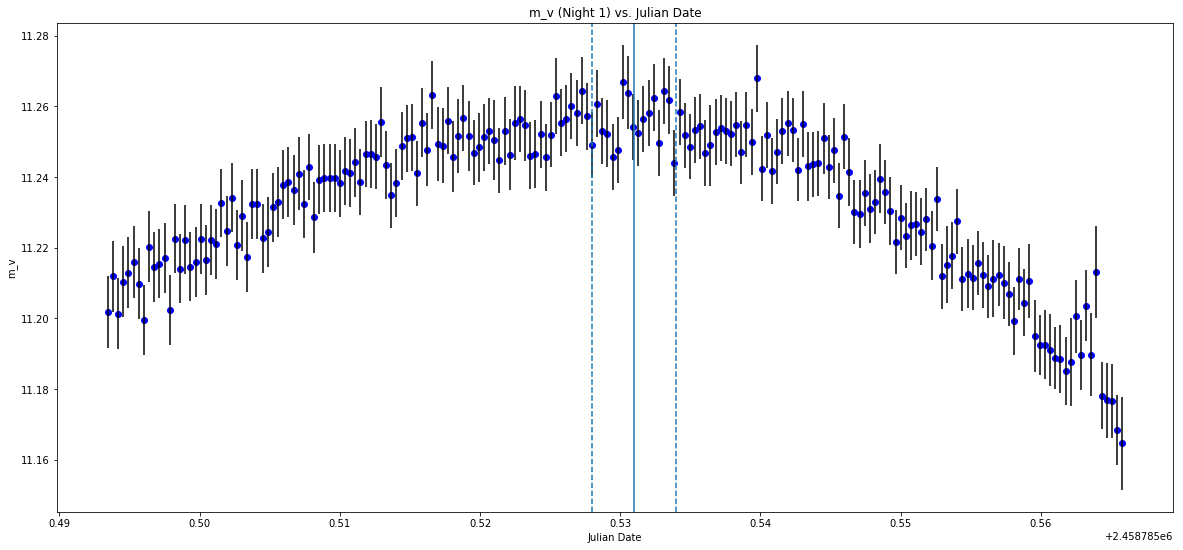

In [69]:
plt.errorbar(corrjdate_n1,magstar_n1, yerr = m_error_n1, color = 'blue', ecolor='black', barsabove='true', fmt='o')

n1maxloc = 0.531+2.458785e6  # Night 1's maximum time
n1maxerr = 0.003             # Error associated with the maximum time
plt.axvline(n1maxloc)   
plt.axvline(n1maxloc+n1maxerr,linestyle='--')
plt.axvline(n1maxloc-n1maxerr,linestyle='--')


plt.title("m_v (Night 1) vs. Julian Date")
plt.ylabel('m_v')
plt.xlabel('Julian Date')
plt.rcParams["figure.figsize"] = [20,9]
plt.show()

We found a maximum at time $T_1$ = 2458785.531 +/- 0.003 Julian Date. Now, let's do the same thing for night 2: 

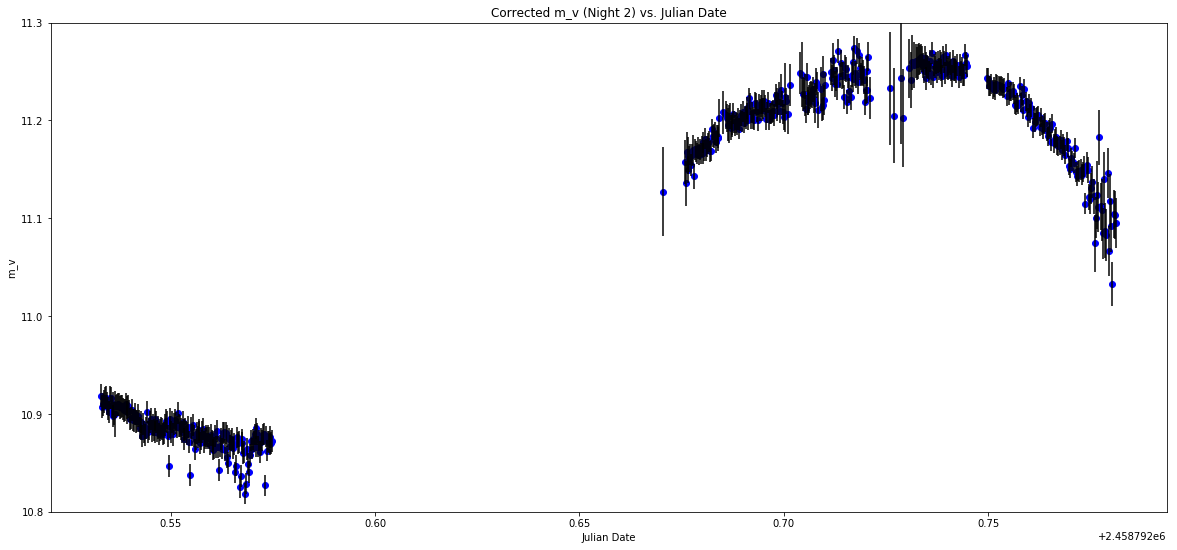

In [70]:
plt.errorbar(rm_m_jdate,rm_m, yerr = rm_m_error, color = 'blue', ecolor='black', barsabove='true', fmt='o')
plt.ylim(10.8,11.3)

plt.title("Corrected m_v (Night 2) vs. Julian Date")
plt.ylabel('m_v')
plt.xlabel('Julian Date')
plt.rcParams["figure.figsize"] = [20,9]
plt.show()

We're only interested in the maximum, so let's cut off that bottom part:

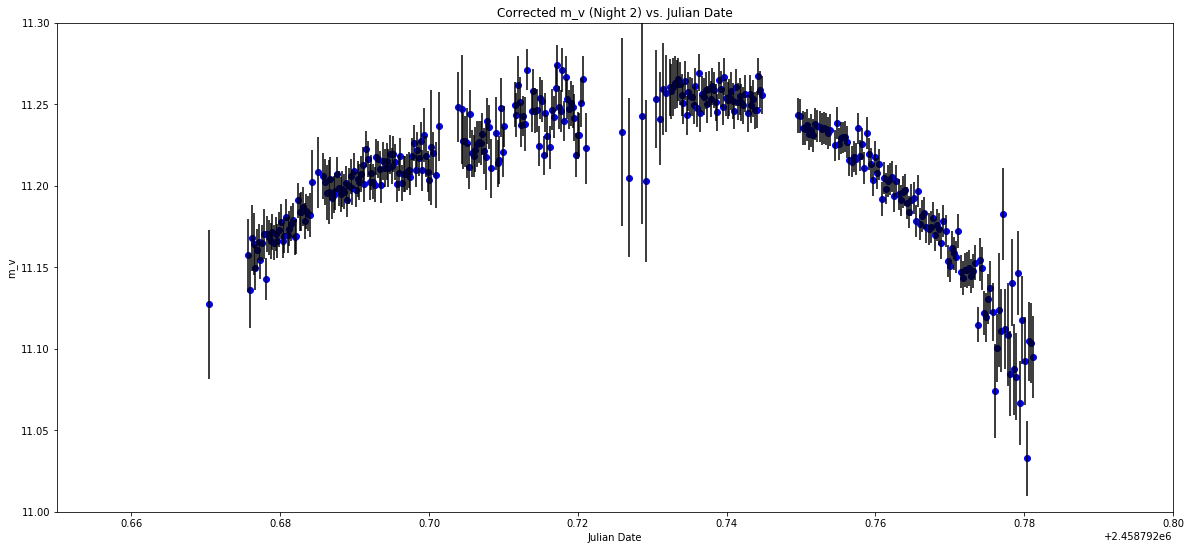

In [71]:
plt.errorbar(rm_m_jdate,rm_m, yerr = rm_m_error, color = 'blue', ecolor='black', barsabove='true', fmt='o')
plt.ylim(11.0,11.3)
plt.xlim(0.65+2458792,0.80+2458792)

plt.title("Corrected m_v (Night 2) vs. Julian Date")
plt.ylabel('m_v')
plt.xlabel('Julian Date')
plt.rcParams["figure.figsize"] = [20,9]
plt.show()

Now let's plot what looks like the maximum in the plot:

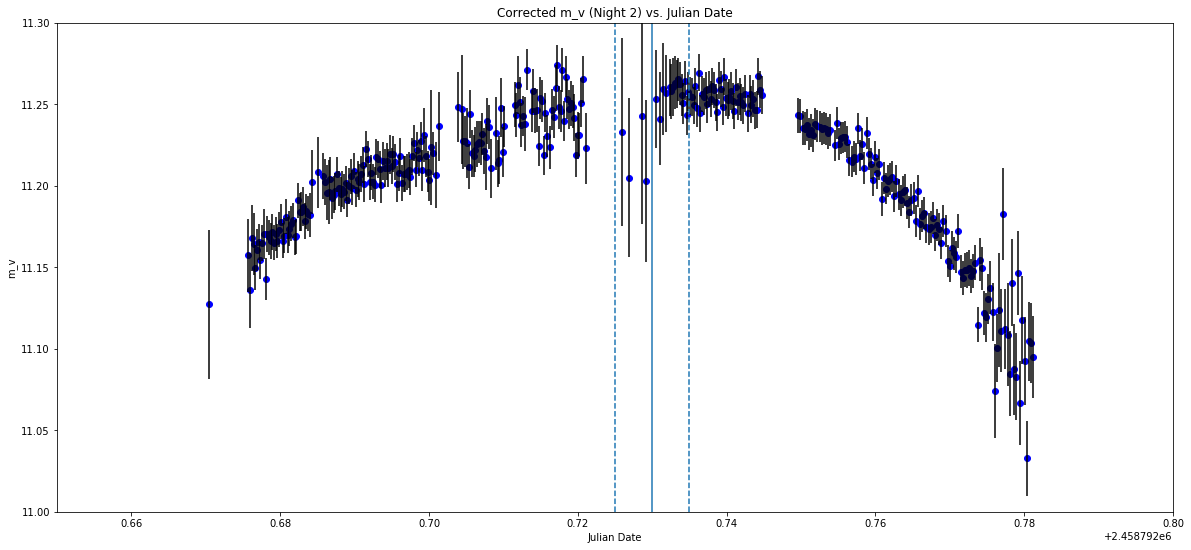

In [72]:
plt.errorbar(rm_m_jdate,rm_m, yerr = rm_m_error, color = 'blue', ecolor='black', barsabove='true', fmt='o')
plt.ylim(11.0,11.3)
plt.xlim(0.65+2458792,0.80+2458792)

n2maxloc = 0.73+2.458792e6  # Night 2's maximum time
n2maxerr = 0.005             # Error associated with the maximum time
plt.axvline(n2maxloc)   
plt.axvline(n2maxloc+n2maxerr,linestyle='--')
plt.axvline(n2maxloc-n2maxerr,linestyle='--')

plt.title("Corrected m_v (Night 2) vs. Julian Date")
plt.ylabel('m_v')
plt.xlabel('Julian Date')
plt.rcParams["figure.figsize"] = [20,9]
plt.show()

We found a maximum at time $T_2$ = 2458792.730 +/- 0.005 Julian Dates. Now let's do it for night three:

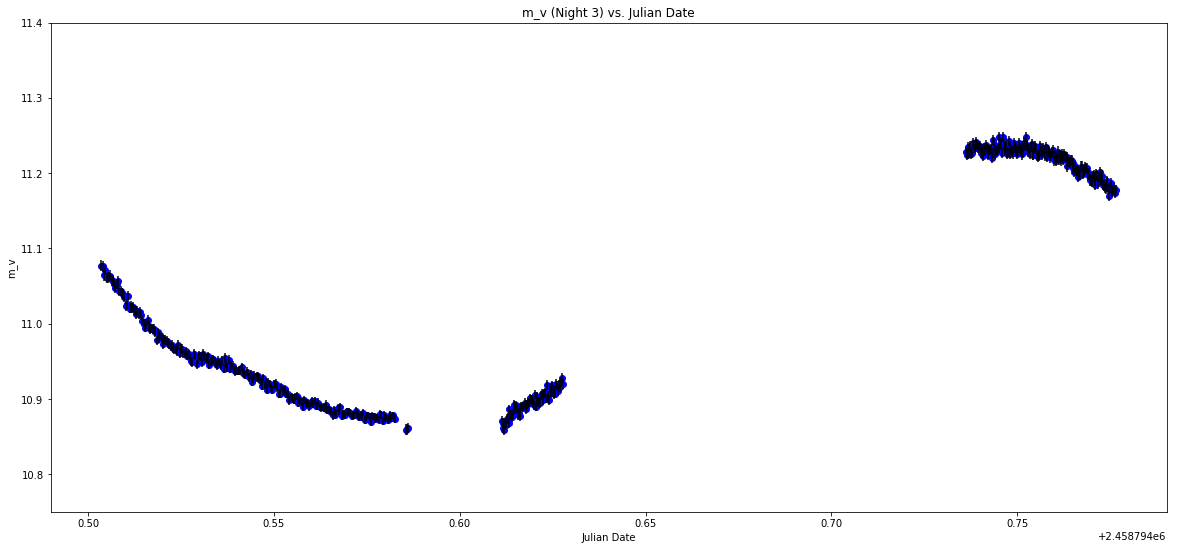

In [73]:
plt.errorbar(jdate_n3,magstar_n3, yerr = m_error_n3, color = 'blue', ecolor='black', barsabove='true', fmt='o')
plt.ylim(10.75,11.4)

plt.title("m_v (Night 3) vs. Julian Date")
plt.ylabel('m_v')
plt.xlabel('Julian Date')
plt.rcParams["figure.figsize"] = [20,9]
plt.show()

We only need the right side of the curve because that's where the maximum appears. So, let's cut out the rest:

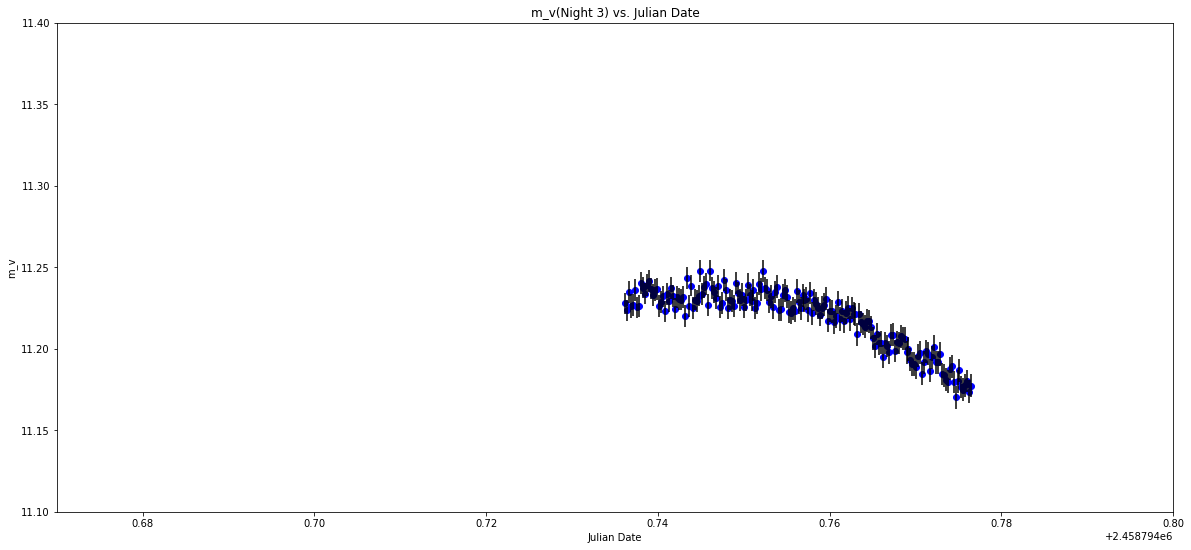

In [74]:
plt.errorbar(jdate_n3,magstar_n3, yerr = m_error_n3, color = 'blue', ecolor='black', barsabove='true', fmt='o')
plt.ylim(11.1,11.4)
plt.xlim(0.67+2458794,0.80+2458794)

plt.title("m_v(Night 3) vs. Julian Date")
plt.ylabel('m_v')
plt.xlabel('Julian Date')
plt.rcParams["figure.figsize"] = [20,9]
plt.show()

Now, let's plot what the maximum looks like on the plot:

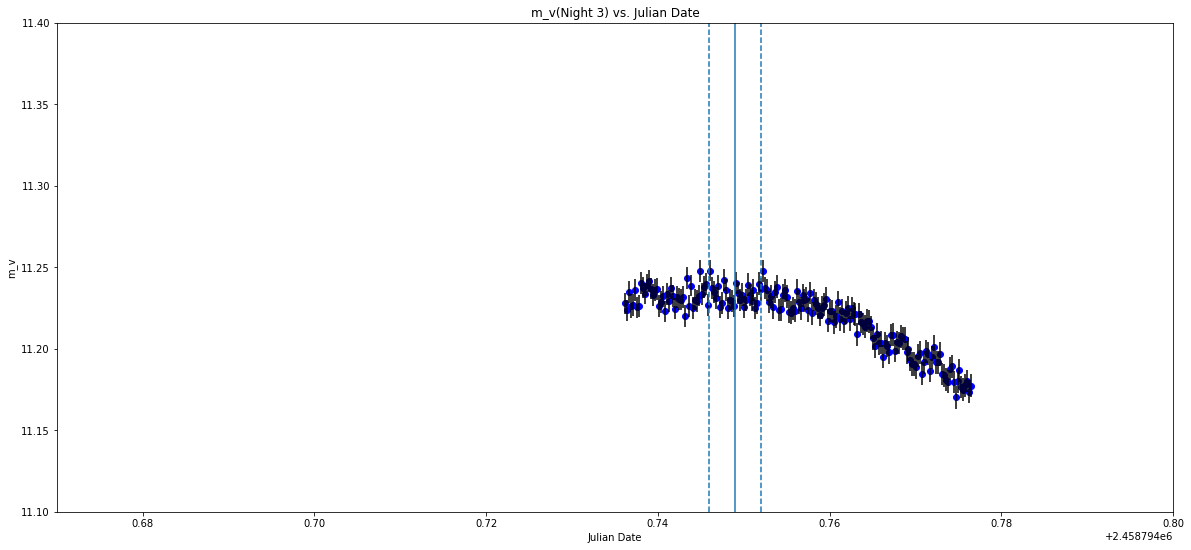

In [75]:
plt.errorbar(jdate_n3,magstar_n3, yerr = m_error_n3, color = 'blue', ecolor='black', barsabove='true', fmt='o')
plt.ylim(11.1,11.4)
plt.xlim(0.67+2458794,0.80+2458794)

n3maxloc = 0.749+2.458794e6  # Night 3's maximum time
n3maxerr = 0.003             # Error associated with the maximum time
plt.axvline(n3maxloc)   
plt.axvline(n3maxloc+n3maxerr,linestyle='--')
plt.axvline(n3maxloc-n3maxerr,linestyle='--')

plt.title("m_v(Night 3) vs. Julian Date")
plt.ylabel('m_v')
plt.xlabel('Julian Date')
plt.rcParams["figure.figsize"] = [20,9]
plt.show()

We found a maximum at time $T_3$ = 2458794.749 +/- 0.003 Julian Dates. Now, let's fit sine curves for the second and third night separately. 

Let's fit the first curve to night 2:

In [76]:
fit_n3_mag = magstar_n3[306:] 
fit_n3_jdate = jdate_n3[306:]
fit_n3_merr = m_error_n3[306:]
test = np.array(fit_n3_jdate)
def fitfunction (x, A, V, bc, P):
    return A/4*(1-V*np.sin((x-bc)/P*(np.pi/180)))

init_vals = [0.2,0.3,9,0.32]
limits = [[0.,0.0,0,0.30], [np.inf,1.0,360,0.35]]

best_vals, covar = ( curve_fit(fitfunction, fit_n3_jdate,fit_n3_mag,p0=init_vals,sigma=fit_n3_merr,bounds=limits) )

x = np.array(range(36000))/100

A = best_vals[0]
V = best_vals[1]
c = best_vals[2]
P = best_vals[3]

print(A,V,c,P)



(3.9793209135404983, 0.35737406699054786, 8.93998003876488, 0.3179572682042324)


We are interested in the second and fourth numbers. The second number represents $A_V$, which is the full amplitude of the fitted sine wave ($A_V$ = 0.357). The fourth number represents the period of the fitted sine wave, which is $P$ = 0.3179.

The uncertainties can be calculated by using the uncertainty of the maximum date from earlier. Therefore, the values of those two numbers are: $A_V$ = 0.357 mag +/- 0.003 mag and $P$ = 0.3179 JDays +/- 0.005 JDays.

Now let's do the same thing for night 2: 

In [77]:
fit_n2_mag = rm_m[184:]
fit_n2_jdate = rm_m_jdate[184:]
fit_n2_merr = rm_m_error[184:]

def fitfunction (x, A, V, bc, P):
    return A/4*(1-V*np.sin((x-bc)/P*(np.pi/180)))

init_vals = [0.2,0.3,9,0.32]
limits = [[0.,0.0,0,0.30], [np.inf,1.0,360,0.35]]

best_vals, covar = ( curve_fit(fitfunction, fit_n2_jdate,fit_n2_mag,p0=init_vals,sigma=fit_n2_merr,bounds=limits) )



A = best_vals[0]
V = best_vals[1]
c = best_vals[2]
P = best_vals[3]

print(A,V,c,P)

(5.155561137648643, 0.3504494801463963, 10.761433956092793, 0.3183421131734535)


We are interested in the second and fourth numbers once again. The second number represents $A_V$, which is the full amplitude of the fitted sine wave ($A_V$ = 0.350). The fourth number represents the period of the fitted sine wave, which is $P$ = 0.3183.

The uncertainties can be calculated by using the uncertainty of the maximum date from earlier. Therefore, the values of those two numbers are: $A_V$ = 0.350 mag +/- 0.002 mag and $P$ = 0.3183 JDays +/- 0.006 JDays. 

Taking the average of the periods, $P$ = 0.3181 JDays +/- 0.00781 JDays

Now let's combine all three nights together using the period we just measured from the fitted sine function:

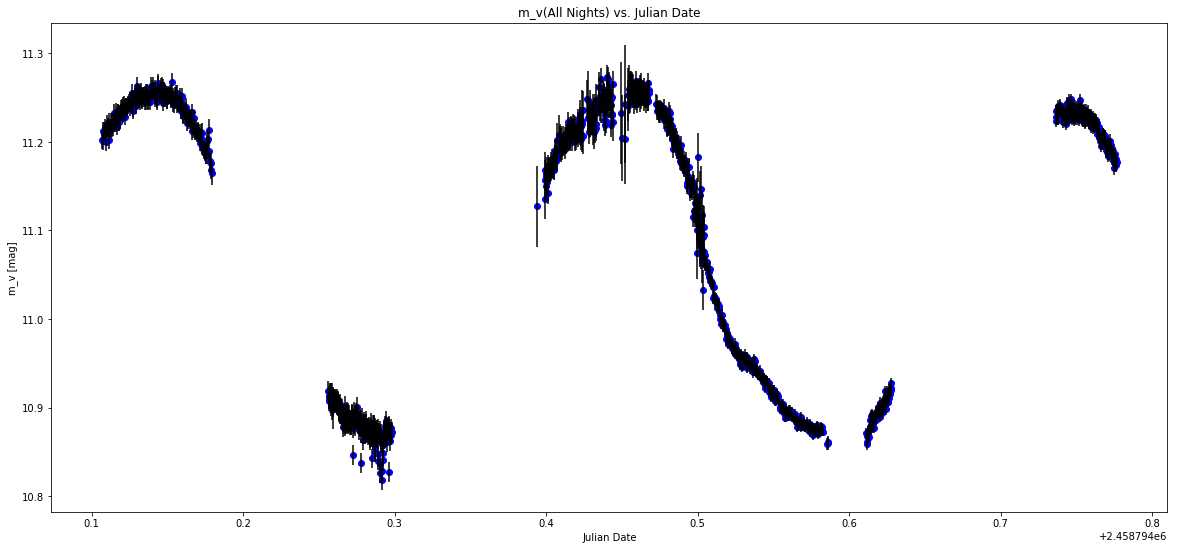

In [78]:
P = 0.3181
P_err = 0.00781 
N1 = (n3maxloc-2458785.531)/P - 1.9
N2 = (n3maxloc-n2maxloc)/P - 0.93

# Shifting night 1 and night 2 time values by the period 
n1_jdate_adj = [t + N1*P for t in corrjdate_n1]   
n2_jdate_adj = [t + N2*P for t in rm_m_jdate]   


# Combine all three nights' worth of jdate and magnitude and its corresponding error and plot it

all_jdate = np.hstack((n1_jdate_adj, n2_jdate_adj, jdate_n3))
all_mags = np.hstack((magstar_n1,rm_m,magstar_n3))      
all_magserr = np.hstack((m_error_n1,rm_m_error,m_error_n3))
plt.errorbar(all_jdate,all_mags, yerr = all_magserr, color = 'blue', ecolor='black', barsabove='true', fmt='o')
plt.title("m_v(All Nights) vs. Julian Date")
plt.ylabel('m_v [mag]')
plt.xlabel('Julian Date')
plt.show()

As you can tell, fitting the second and third night to get the period has worked well in combining all three nights. Now let's change the x-axis to phase so it's easier to understand:

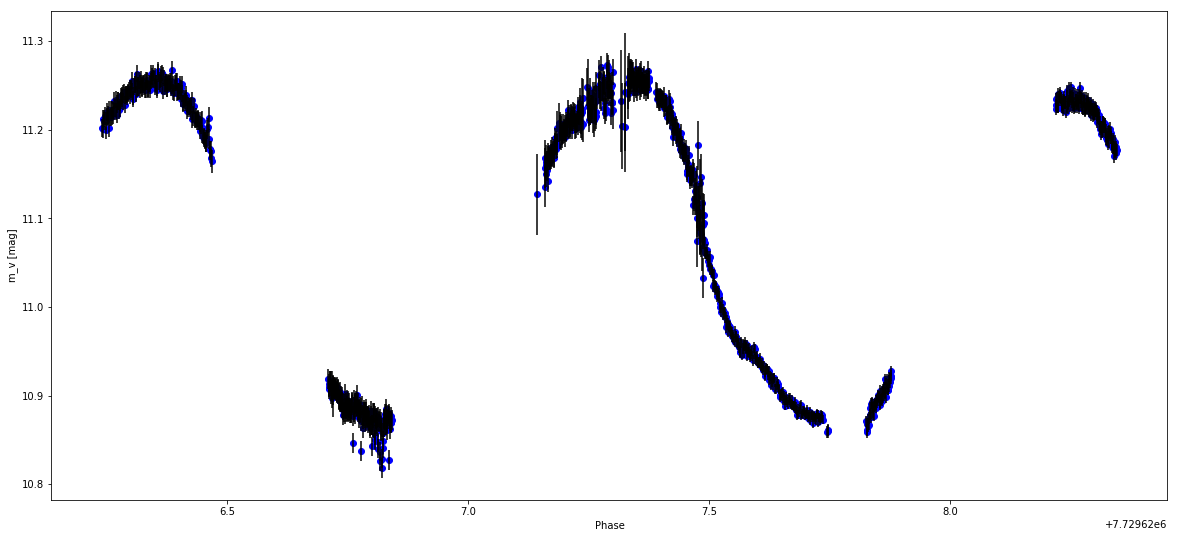

In [79]:
phase = [t / P for t in all_jdate]


plt.errorbar(phase, all_mags, yerr = all_magserr, color = 'blue', ecolor='black', barsabove='true', fmt='o')
plt.ylabel('m_v [mag]')
plt.xlabel('Phase')
plt.show()

This plot is somewhat messy because it should start at zero instead and it should no longer be in Julian Days. Let's correct for that:

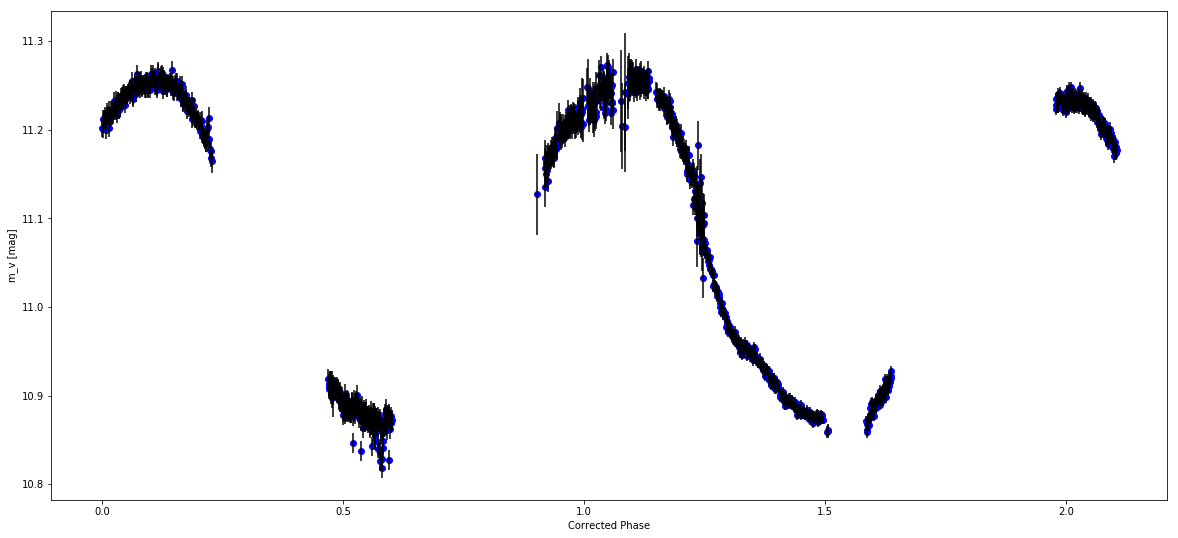

In [80]:
corr_phase = [t - phase[0] for t in phase]

plt.errorbar(corr_phase, all_mags, yerr = all_magserr, color = 'blue', ecolor='black', barsabove='true', fmt='o')
plt.ylabel('m_v [mag]')
plt.xlabel('Corrected Phase')
plt.show()

Now, let's perform a sinusoidal fit to this plot to obtain our final values of magnitude amplitude and period:

(44.2074865817062, 0.01762123564249121, 41.69774386678726, 0.32580532320573824)


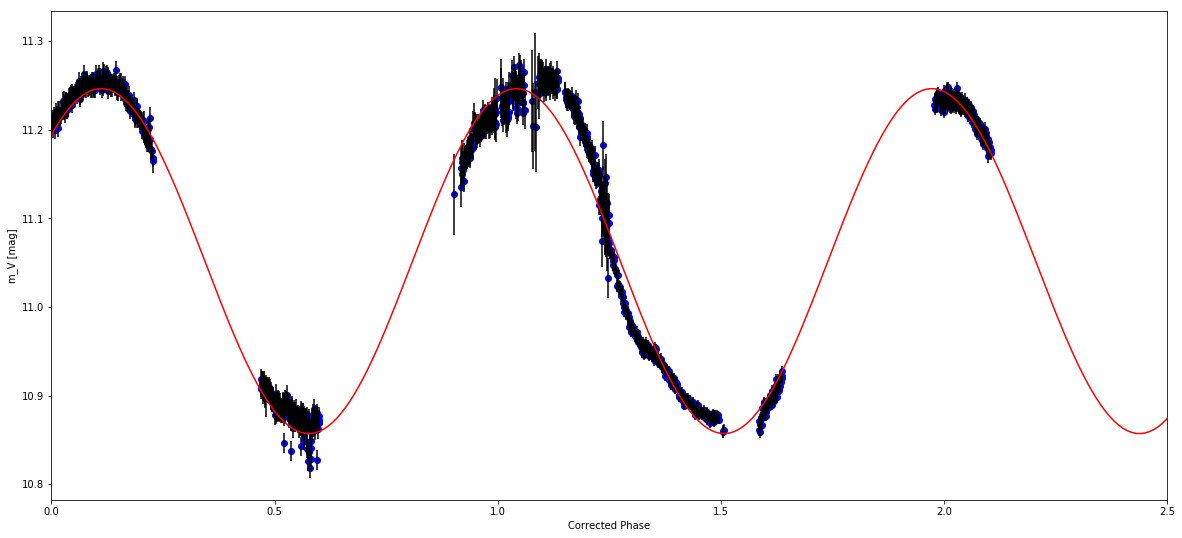

In [81]:

def fitfunction (x, A, V, bc, P):
    return A/4*(1-V*np.sin((2.2*x-bc)/P))

init_vals = [0.2,0.3,9,0.32]
limits = [[0.,0.0,0,0.30], [np.inf,1.0,360,0.35]]

best_vals, covar = ( curve_fit(fitfunction, corr_phase,all_mags,p0=init_vals,sigma=all_magserr,bounds=limits) )



A = best_vals[0]
V = best_vals[1]
c = best_vals[2]
P = best_vals[3]

print(A,V,c,P)

x = np.array(range(36000))/100

plt.errorbar(corr_phase, all_mags, yerr = all_magserr, color = 'blue', ecolor='black', barsabove='true', fmt='o')
plt.plot(x,fitfunction(x,A,V,c,P), color='r')
plt.xlim(0,2.5)
plt.xlabel('Corrected Phase')
plt.ylabel('m_V [mag]')
plt.show()

The period that we measured was 0.325 days +/- 0.00621 days.

From (Ferro 2007) and (Morgen et. al 2007), the metallicity in a RRc Lyrae star is:
\begin{eqnarray}
Z = 52.466 P^2 - 30.075 P + 0.131 \left( \phi_{31}^{(c)} \right)^2 + 0.982 \phi_{31}^{(c)} - 4.198 \phi_{31}^{(c)} P + 2.424 
\end{eqnarray}
(from Morgan et. al 2007), where 
\begin{eqnarray}
\phi_{31}^{(c)} = \phi_3 - 3 \phi_1 
\end{eqnarray}
comes from fitting a Fourier series
\begin{eqnarray}
m_V (t) = a_0 + \sum_{n=1}^N a_n \cos \left( n x + \phi_n^{(c)} \right)
\end{eqnarray}

In this case, x would be equal to:
\begin{eqnarray}
x \equiv 2 \pi \left( \frac{ t_{adj} - t_0}{P} \right)
\end{eqnarray}
where $t_0$ is the time when the maximum brightness occurs. 

We propagate the error by using simple error propagation: 
\begin{eqnarray}
\sigma_{Z} = \sqrt{ \left( \frac{\partial Z}{\partial P} \right)^2 \sigma_P^2 + \left( \frac{\partial Z}{\partial \phi} \right)^2 \sigma_\phi^2 }
\end{eqnarray}

One of my co-authors fitted this using MATLAB, where they found the two phase parameters above.

In [82]:
# Data points found from one of my co-authors fitting the fourier series function 

P = 0.3258
p1 = 0.1565
p1err = p1-0.1417
p3 = 4.3
p3err = 4.53 - p3

p31 = p3 - 3*p1

p31err = np.sqrt( p3err**2 + (3*p1err)**2)

# Now let's calculate the error of the metallicity by using the equation above
term1 = 2*52.466*P - 30.075 - 4.198*p31 # This is the dZ/dP term
term2 = 2*0.131*p31 + 0.982 - 4.198*P   # This is the dZ/dphi term

Z = 52.466*P**2 - 30.075*P + 0.131*(p31)**2 + 0.982*(p31) - 4.198*(p31)*P + 2.424

Zerr = np.sqrt( term1**2 *P_err**2 + term2**2 *p31err**2)

print("[Fe/H] = Z =",Z, "+/-",Zerr)

('[Fe/H] = Z =', -1.3607262152100006, '+/-', 0.17229698229993176)


Let's find the absolute magnitude so we can find the distance by using this equation from Kovacs 1998: 

\begin{eqnarray}
M_V = -0.961 P - 0.044 \phi_{21}^{(s)} + 4.447 a_4 + 1.061,
\end{eqnarray}

and its' error is propagated the same way as the error of the metallicity. The equation can be seen in the lab report.

In [83]:
# Phi_21, Phi_2 and a_4 were found from my co-author's MATLAB fitting once again:

p_2 = -6.291
p2_err = abs(-6.207-p_2)

p_21 =  -6.291-2*0.1565
p21_err = np.sqrt(  (p2_err)**2 + (2*p1err)**2 )

a_4 = .01236
a4_err = 0.01402-a_4

M_V = -0.961*P -0.044*p_21+4.447*a_4+1.061

# Terms are dm/dP, dm/dphi_21, dm/a_4

term1 = -0.961
term2 = -0.044
term3 = 4.447

M_V_err = np.sqrt( (term1)**2 * (P_err)**2 + (term2)**2 * (p21_err)**2 + (term3)**2 * (a4_err)**2 )

print('Absolute Magnitude M_V =',M_V,'+/-',M_V_err)

('Absolute Magnitude M_V =', 1.09344712, '+/-', 0.01123307884368752)


Now, let's find the distance using this equation:
\begin{eqnarray}
d =  10^{ \frac{m_V - M_V + 5}{5} }
\end{eqnarray}

In [84]:
# m_V in this case will be the average magnitude in our light curve
m_V = np.mean(all_mags)

# Let's compute the error of the average magnitude: 
b = 0.0
for x in all_mags:
    a = abs(x - m_V)
    b += a**2
c = len(all_mags)-1
m_V_err = np.sqrt(b/c)

# Let's compute distance now:

dist = 10**( (m_V - M_V +5)/5 )

# Now the dist_err: 

dist_err = np.sqrt( ((m_V_err)**2 + (M_V_err)**2) * ( ((m_V - M_V + 5)/5)**4 * ((m_V - M_V)/5)**10 * np.log(10)**2))  
print('Apparent magnitude average =',m_V,'mag +/-',m_V_err)
print('Distance from star',dist,'pc +/-',dist_err)

('Apparent magnitude average =', 11.092919454498402, 'mag +/-', 0.15646964922413312)
('Distance from star', 999.757030578238, 'pc +/-', 103.9942747273859)
